In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report

In [ ]:
df=pd.read_csv('kddcup99_csv.csv')

In [ ]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal


In [ ]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'lnum_compromised', 'lroot_shell',
       'lsu_attempted', 'lnum_root', 'lnum_file_creations', 'lnum_shells',
       'lnum_access_files', 'lnum_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'label'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494020 entries, 0 to 494019
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494020 non-null  int64  
 1   protocol_type                494020 non-null  object 
 2   service                      494020 non-null  object 
 3   flag                         494020 non-null  object 
 4   src_bytes                    494020 non-null  int64  
 5   dst_bytes                    494020 non-null  int64  
 6   land                         494020 non-null  int64  
 7   wrong_fragment               494020 non-null  int64  
 8   urgent                       494020 non-null  int64  
 9   hot                          494020 non-null  int64  
 10  num_failed_logins            494020 non-null  int64  
 11  logged_in                    494020 non-null  int64  
 12  lnum_compromised             494020 non-null  int64  
 13 

In [ ]:
df.shape

(494020, 42)

In [ ]:
df.isna().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
lnum_compromised               0
lroot_shell                    0
lsu_attempted                  0
lnum_root                      0
lnum_file_creations            0
lnum_shells                    0
lnum_access_files              0
lnum_outbound_cmds             0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [ ]:
print('Data set:')
for col_name in df.columns:
    if df[col_name].dtypes == 'object' :
        unique_cat = len(df[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))

print()
print('Distribution of categories in service:')
print(df['service'].value_counts().sort_values(ascending=False).head())

Data set:
Feature 'protocol_type' has 3 categories
Feature 'service' has 66 categories
Feature 'flag' has 11 categories
Feature 'label' has 23 categories

Distribution of categories in service:
ecr_i      281400
private    110893
http        64292
smtp         9723
other        7237
Name: service, dtype: int64


In [ ]:
from sklearn import preprocessing

In [ ]:
lab=preprocessing.LabelEncoder()

In [ ]:
df['protocol_type']=lab.fit_transform(df['protocol_type'])
df['service']=lab.fit_transform(df['service'])
df['flag']=lab.fit_transform(df['flag'])

In [ ]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,1,22,9,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal
1,0,1,22,9,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal
2,0,1,22,9,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
3,0,1,22,9,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
4,0,1,22,9,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494020 entries, 0 to 494019
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494020 non-null  int64  
 1   protocol_type                494020 non-null  int64  
 2   service                      494020 non-null  int64  
 3   flag                         494020 non-null  int64  
 4   src_bytes                    494020 non-null  int64  
 5   dst_bytes                    494020 non-null  int64  
 6   land                         494020 non-null  int64  
 7   wrong_fragment               494020 non-null  int64  
 8   urgent                       494020 non-null  int64  
 9   hot                          494020 non-null  int64  
 10  num_failed_logins            494020 non-null  int64  
 11  logged_in                    494020 non-null  int64  
 12  lnum_compromised             494020 non-null  int64  
 13 

### Rename all label: 0=normal, 1=DoS, 2=Probe, R2L and U2R.

DOS: denial-of-service, e.g. syn flood;
R2L: unauthorized access from a remote machine, e.g. guessing password;
U2R: unauthorized access to local superuser (root) privileges, e.g., various ``buffer overflow’’ attacks;
probing: surveillance and other probing, e.g., port scanning.

In [ ]:
df1=df['label']

In [ ]:
print('Label distribution Training set:')
print(df['label'].value_counts())

Label distribution Training set:
smurf              280790
neptune            107201
normal              97277
back                 2203
satan                1589
ipsweep              1247
portsweep            1040
warezclient          1020
teardrop              979
pod                   264
nmap                  231
guess_passwd           53
buffer_overflow        30
land                   21
warezmaster            20
imap                   12
rootkit                10
loadmodule              9
ftp_write               8
multihop                7
phf                     4
perl                    3
spy                     2
Name: label, dtype: int64


In [ ]:
newdf=df1.replace({'normal':0,'smurf':1,'neptune':1,'back':1,'satan':2,'ipsweep':2,'portsweep':2,'warezclient': 2,'teardrop': 1,
                  'pod': 1,'nmap' : 2,'guess_passwd': 2,'buffer_overflow': 2,'land': 1,'warezmaster': 2,'imap': 2,'rootkit': 2,
                  'loadmodule': 2,'ftp_write': 2,'multihop': 2,'phf': 2,'perl': 2,'spy': 2})

In [ ]:
print(newdf.head())
#newdf.to_csv('label.csv')

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64


In [ ]:
df['label'] = newdf
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,1,22,9,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,0
1,0,1,22,9,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0
2,0,1,22,9,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0
3,0,1,22,9,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0
4,0,1,22,9,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494020 entries, 0 to 494019
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494020 non-null  int64  
 1   protocol_type                494020 non-null  int64  
 2   service                      494020 non-null  int64  
 3   flag                         494020 non-null  int64  
 4   src_bytes                    494020 non-null  int64  
 5   dst_bytes                    494020 non-null  int64  
 6   land                         494020 non-null  int64  
 7   wrong_fragment               494020 non-null  int64  
 8   urgent                       494020 non-null  int64  
 9   hot                          494020 non-null  int64  
 10  num_failed_logins            494020 non-null  int64  
 11  logged_in                    494020 non-null  int64  
 12  lnum_compromised             494020 non-null  int64  
 13 

In [ ]:
df.to_csv('New_Data.csv')

In [ ]:
data = pd.read_csv("New_Data.csv")

<Axes: xlabel='label', ylabel='count'>

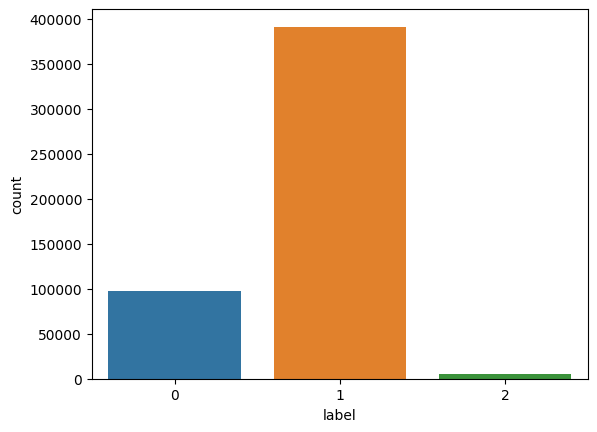

In [ ]:
sns.countplot(x='label',data=data)

# Feature Selection

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()

In [ ]:
import numpy as np
import pandas as pd

# Assuming 'data' is your DataFrame
X = data.iloc[:, data.columns != 'label']
y = data.iloc[:, data.columns == 'label']

# Check for missing values in X
print(np.isnan(X.values).any())


False


In [ ]:
model.fit(X,y)
print(model.feature_importances_)

[1.33416774e-02 1.39494247e-03 7.31417057e-02 2.06082197e-02
 2.69123482e-02 8.92698438e-03 1.20625406e-03 2.70756055e-05
 7.41008194e-03 1.09702438e-05 9.07867742e-03 1.84662070e-04
 1.68991323e-01 5.79852999e-03 1.23543312e-04 3.77722724e-06
 5.10699441e-05 4.53904192e-05 2.21047189e-05 5.68459913e-05
 0.00000000e+00 0.00000000e+00 8.37454007e-04 1.56439579e-01
 6.96444109e-02 2.72416464e-02 2.23072872e-02 9.71987118e-03
 6.81857446e-03 7.42066848e-02 6.47428708e-03 1.16548941e-02
 7.96796374e-02 2.24010954e-02 1.95435457e-02 1.54414661e-02
 7.32539470e-02 6.22088666e-03 1.19212501e-02 2.80580052e-02
 1.09137733e-02 9.88552060e-03]


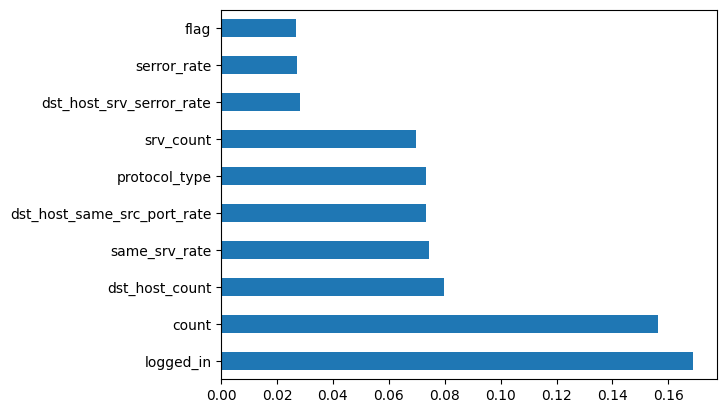

In [ ]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [ ]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

In [ ]:
bestfeatures = SelectKBest(score_func=chi2, k=17)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [ ]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
featureScores.nlargest(17,'Score')

,Specs,Score
5,src_bytes,6.116996e+10
0,Unnamed: 0,3.879480e+09
6,dst_bytes,2.308604e+09
1,duration,9.867518e+07
23,count,3.954004e+07
24,srv_count,3.519352e+07
32,dst_host_count,3.922659e+06
33,dst_host_srv_count,6.381743e+05
10,hot,3.765047e+05
12,logged_in,2.675627e+05


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
xtrain, xtest, ytrain, ytest=train_test_split(X, y, test_size=0.33)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf=RandomForestClassifier()

In [ ]:
rf.fit(xtrain,ytrain)

RandomForestClassifier()

In [ ]:
predic=rf.predict(xtest)

In [ ]:
acc1=accuracy_score(predic,ytest)
acc1

0.9997975795420391

In [ ]:
clf=classification_report(predic,ytest)
print(clf)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     32208
           1       1.00      1.00      1.00    129186
           2       0.99      1.00      0.99      1633

    accuracy                           1.00    163027
   macro avg       1.00      1.00      1.00    163027
weighted avg       1.00      1.00      1.00    163027



In [ ]:
from sklearn import svm

In [ ]:
sv=svm.LinearSVC()

In [ ]:
sv.fit(xtrain,ytrain)

LinearSVC()

In [ ]:
predic1=sv.predict(xtest)

In [ ]:
acc2=accuracy_score(predic1,ytest)
acc2

0.925306851012409

In [ ]:
clf1=classification_report(predic1,ytest)
print(clf1)

              precision    recall  f1-score   support

           0       0.68      0.97      0.80     22765
           1       1.00      0.93      0.96    138979
           2       0.02      0.03      0.02      1283

    accuracy                           0.93    163027
   macro avg       0.57      0.64      0.59    163027
weighted avg       0.95      0.93      0.93    163027



In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lg=LogisticRegression()

In [ ]:
lg.fit(xtrain,ytrain)

LogisticRegression()

In [ ]:
predic2=lg.predict(xtest)

In [ ]:
acc3=accuracy_score(predic2,ytest)
acc3

0.9203812865353592

In [ ]:
clf2=classification_report(predic2,ytest)
print(clf2)

              precision    recall  f1-score   support

           0       0.68      0.92      0.78     23884
           1       0.99      0.92      0.95    139106
           2       0.01      0.43      0.02        37

    accuracy                           0.92    163027
   macro avg       0.56      0.76      0.59    163027
weighted avg       0.95      0.92      0.93    163027



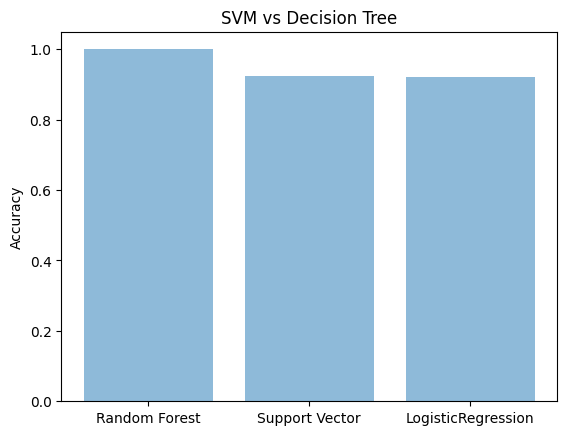

In [ ]:
import matplotlib.pyplot as plt; plt.rcdefaults()

objects = ('Random Forest','Support Vector','LogisticRegression')
y_pos = np.arange(len(objects))
performance = [acc1,acc2,acc3]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('SVM vs Decision Tree')

plt.show()